In [ ]:
# %load init.ipy
import os, sys, logging, datetime
from importlib import reload

import numpy as np
import scipy as sp
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from nose import tools

import corner
import tqdm
import memory_profiler as mpro

import kalepy as kale

# NOTE: This is for when the notebook is converted to a python script
def get_ipython():
    return type('Dummy', (object,), dict(run_line_magic=lambda *args, **kwargs: None))

%reload_ext autoreload
%autoreload 2


## Cholesky Whitening and Coloring

data:
[[6.67458373 3.58982732]
 [3.58982732 2.39621804]]
[[ 1.09186725 -0.00275283]
 [-0.00275283  1.0649858 ]]
clean:
[[0.91865162 0.02983617]
 [0.02983617 1.07106813]]
[[5.74157265 3.14921905]
 [3.14921905 2.18479562]]


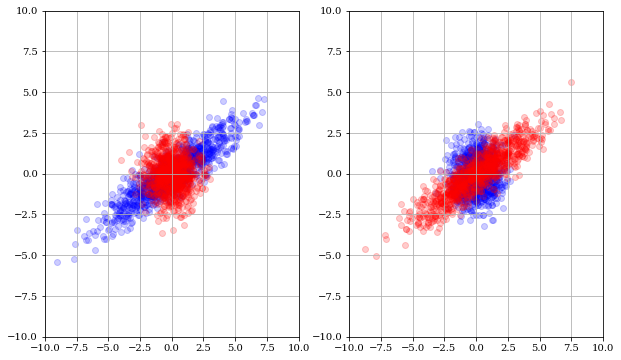

In [2]:
NUM = 1000

sigma = [2.5, 1.5]
corr = 0.9

s2 = np.square(sigma)
cc = corr*sigma[0]*sigma[1]
cov = [[s2[0], cc], [cc, s2[1]]]

cov = np.array(cov)
cov_inv = np.linalg.inv(cov)
color = sp.linalg.cholesky(cov)
white = sp.linalg.cholesky(cov_inv)

data = np.random.multivariate_normal([0.0, 0.0], cov, NUM).T
clean = np.random.multivariate_normal([0.0, 0.0], [[1.0, 0.0], [0.0, 1.0]], size=NUM).T

norm = np.sqrt(np.linalg.det(2*np.pi*cov))

data_inv = np.dot(white, data)
clean_col = np.dot(color.T, clean)


print("data:")
print(np.cov(*data))
print(np.cov(*data_inv))

print("clean:")
print(np.cov(*clean))
print(np.cov(*clean_col))



fig, axes = plt.subplots(figsize=[10, 6], ncols=2)
for ax in axes:
    ax.set(xlim=[-10, 10], ylim=[-10, 10])
    ax.grid()

ax = axes[0]
ax.scatter(*data, alpha=0.2, color='b')
ax.scatter(*data_inv, alpha=0.2, color='r')

ax = axes[1]
ax.scatter(*clean, alpha=0.2, color='b')
ax.scatter(*clean_col, alpha=0.2, color='r')

plt.show()

[[1.  0.4]
 [0.4 1. ]]
norm =  0.9573479717381596
clean:
[[0.33427732 0.00363803]
 [0.00363803 0.33512546]]
color:
[[0.36472646 0.14952862]
 [0.14952862 0.36841422]]
test:
[[0.42640629 0.29675585]
 [0.29675585 0.42718362]]


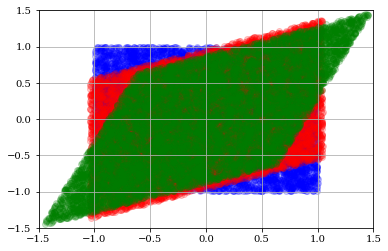

In [3]:
NUM = 10000

sigma = [1.0, 1.0]
corr = 0.4

s2 = np.square(sigma)
cc = corr*sigma[0]*sigma[1]
cov = [[s2[0], cc], [cc, s2[1]]]

cov = np.array(cov)
print(cov)

cov_inv = np.linalg.inv(cov)
color_mat = sp.linalg.cholesky(cov)
# white_mat = sp.linalg.cholesky(cov_inv)
norm = np.sqrt(np.linalg.det(color_mat))
print("norm = ", norm)

clean_data = np.random.uniform(-1.0, 1.0, size=2*NUM).reshape(2, NUM)

# data_inv = np.dot(white, data)
color_data = np.dot(color_mat.T, clean_data) / norm
test_data = np.dot(cov, clean_data) / norm

print("clean:")
print(np.cov(*clean_data))
print("color:")
print(np.cov(*color_data))
print("test:")
print(np.cov(*test_data))


fig, ax = plt.subplots()   # figsize=[10, 6], ncols=2)
ax.set(xlim=[-1.5, 1.5], ylim=[-1.5, 1.5])
ax.grid()

ax.scatter(*clean_data, alpha=0.2, color='b')
ax.scatter(*color_data, alpha=0.2, color='r')
ax.scatter(*test_data, alpha=0.2, color='g')

plt.show()

[[2.25  1.575]
 [1.575 2.25 ]] 

data_cov = 
 [[2.27866707 1.60325111]
 [1.60325111 2.30732379]]
uncolor_cov = 
 [[1.01274092 0.00509339]
 [0.00509339 1.02772906]]
recolor_cov = 
 [[2.27866707 1.60325111]
 [1.60325111 2.30732379]]


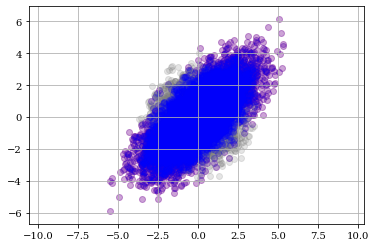

In [4]:
NUM = 10000

sigma = [1.5, 1.5]
corr = 0.7

s2 = np.square(sigma)
cc = corr*sigma[0]*sigma[1]
cov = [[s2[0], cc], [cc, s2[1]]]

cov = np.array(cov)
print(cov, "\n")

color_mat = sp.linalg.cholesky(cov)
color_norm = np.sqrt(np.linalg.det(color_mat))
# print("color_norm = ", color_norm)

uncolor_mat = np.linalg.inv(color_mat)
uncolor_norm = np.sqrt(np.linalg.det(uncolor_mat))
# print("uncolor_norm = ", uncolor_norm)

cov_inv = np.linalg.inv(cov)
white_mat = sp.linalg.cholesky(cov_inv)
white_norm = np.sqrt(np.linalg.det(white_mat))
# print("white_norm = ", white_norm)




data = np.random.multivariate_normal(np.zeros(2), cov, NUM).T
data_cov = np.cov(*data)
print("data_cov = \n", data_cov)

uncolor_data = np.dot(uncolor_mat.T, data) # / uncolor_norm
uncolor_cov = np.cov(*uncolor_data)
print("uncolor_cov = \n", uncolor_cov)

# recolor_data = np.dot(cov, data) # / color_norm
# recolor_cov = np.cov(*recolor_data)
# print("recolor_cov = \n", recolor_cov)


# DOES NOT WORK
recolor_data = np.dot(color_mat.T, uncolor_data) # / color_norm
recolor_cov = np.cov(*recolor_data)
print("recolor_cov = \n", recolor_cov)




# white_data = np.dot(white_mat, data) # / uncolor_norm
# white_cov = np.cov(*white_data)
# print("white_cov = \n", white_cov)


# white_data = np.dot(white_mat, data) / white_norm
# white_cov = np.cov(*white_data)
# print("white_cov = ", white_cov)

# unwhite_data = np.dot(color_mat.T, white_data) / color_norm
# unwhite_cov = np.cov(*unwhite_data)
# print("unwhite_cov = ", unwhite_cov)

# data_inv = np.dot(white, data)
# color_data = np.dot(color_mat.T, clean_data) / norm
# test_data = np.dot(cov, clean_data) / norm

# print("clean:")
# print(np.cov(*clean_data))
# print("color:")
# print(np.cov(*color_data))
# print("test:")
# print(np.cov(*test_data))


fig, ax = plt.subplots()   # figsize=[10, 6], ncols=2)
# ax.set(xlim=[-1.5, 1.5], ylim=[-1.5, 1.5])
ax.grid()
ax.axis('equal')


ax.scatter(*data, alpha=0.2, color='r')
ax.scatter(*uncolor_data, alpha=0.2, color='0.5')
ax.scatter(*recolor_data, alpha=0.2, color='b')

# ax.scatter(*white_data, alpha=0.2, color='g')
# ax.scatter(*unwhite_data, alpha=0.2, color='g')

plt.show()

[[1.  0.4]
 [0.4 1. ]]
data_cov = 
 [[0.33472053 0.00071844]
 [0.00071844 0.33255233]]
white_cov = 
 [[ 1.00000000e+00 -9.99300652e-18]
 [-9.99300652e-18  1.00000000e+00]]
color_cov = 
 [[1.  0.4]
 [0.4 1. ]]
test_cov = 
 [[0.33472053 0.13454667]
 [0.13454667 0.33342601]]


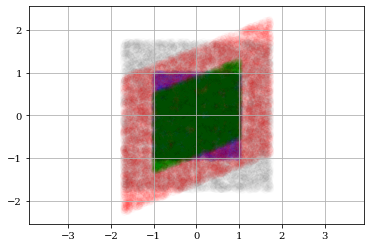

In [5]:
NUM = 10000

sigma = [1.0, 1.0]
corr = 0.4

s2 = np.square(sigma)
cc = corr*sigma[0]*sigma[1]
cov = [[s2[0], cc], [cc, s2[1]]]

cov = np.array(cov)
print(cov)

# cov_inv = np.linalg.inv(cov)
# color_mat = sp.linalg.cholesky(cov)
# white_mat = sp.linalg.cholesky(cov_inv)
# norm = np.sqrt(np.linalg.det(color_mat))
# print("norm = ", norm)

data = np.random.uniform(-1.0, 1.0, size=2*NUM).reshape(2, NUM)
data_cov = np.cov(*data)
print("data_cov = \n", data_cov)

color_mat = sp.linalg.cholesky(cov)
# print("color_mat = \n", color_mat)
white_mat = np.linalg.inv(sp.linalg.cholesky(data_cov))
# print("white_mat = \n", white_mat)
white_data = np.dot(white_mat.T, data)
white_cov = np.cov(*white_data)
print("white_cov = \n", white_cov)

color_data = np.dot(color_mat.T, white_data)
color_cov = np.cov(*color_data)
print("color_cov = \n", color_cov)

test_data = np.dot(color_mat.T, data)
test_cov = np.cov(*test_data)
print("test_cov = \n", test_cov)


fig, ax = plt.subplots()   # figsize=[10, 6], ncols=2)
# ax.set(xlim=[-1.5, 1.5], ylim=[-1.5, 1.5])
ax.axis('equal')
ax.grid()

ax.scatter(*data, alpha=0.02, color='b')
ax.scatter(*white_data, alpha=0.02, color='0.5')
ax.scatter(*color_data, alpha=0.02, color='r')
ax.scatter(*test_data, alpha=0.02, color='g')

plt.show()